<center><font size="+4">Programming & Data Analytics & AI 2 PM 2024/2025</font></center>
<center><font size="+2">Sant'Anna School of Advanced Studies, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/jupyter/jupyterNotebooks/images/sssaLEMBEDSdtu.png" width="900" alt="L'EMbeDS"></center>

<center><font size="+2">Course responsible</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

---

<center><font size="+4">BPM 2025/2026</font></center>
<center><font size="+2">University of Pisa, Pisa, Italy</font></center>
<center><img src="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/raw/main/PDAI/jupyter/jupyterNotebooks/images/sssaLEMBEDSdtu.png" width="900" alt="L'EMbeDS"></center>

<center><font size="+2">Four Classes on Process Mining</font></center>
<center><font size="+2">Andrea Vandin a.vandin@santannapisa.it</font></center>

---

<center><font size="+2">Notebook for Class 2" </font></center>
<center><font size="+2">The Python library for Process Mining: PM4Py
</font></center>

---
---

In [1]:
url_github_repo_basic="https://github.com/EMbeDS-education/ComputingDataAnalysisModeling20252026/raw/main/"
url_github_repo=url_github_repo_basic+"BPM_PM/"

After the quick overview on numpy and pandas
- Today we get back to process-oriented data science
- What do you recall from our first class!?
  - Let's test it! :D
  - __Process mining quiz!__

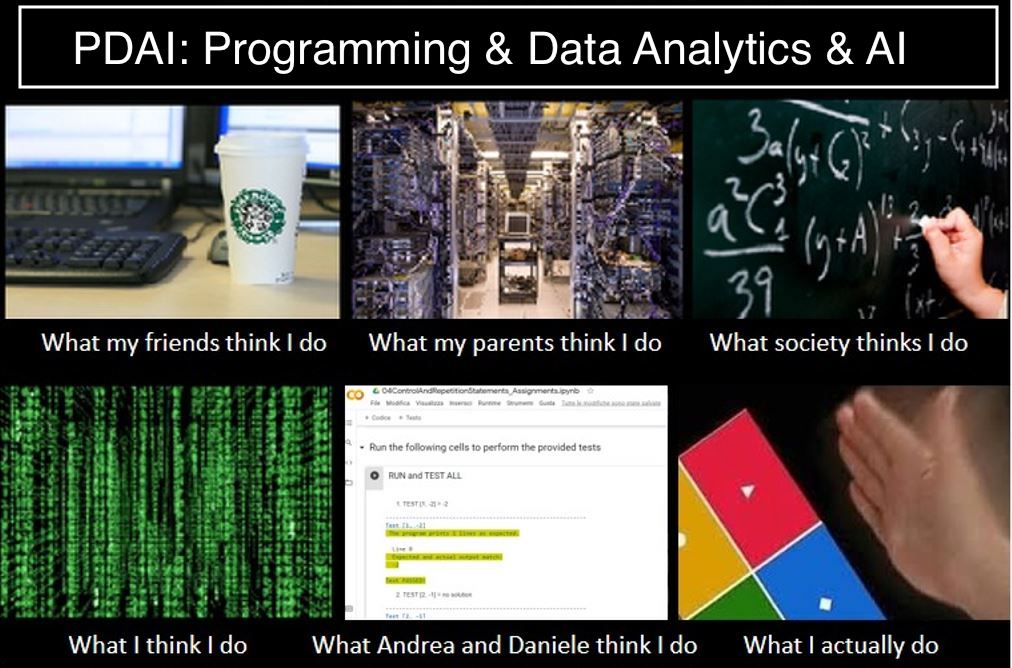

In [2]:
from IPython.display import Image, display
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/lastKahootMeme.JPG',width=700)
display(img)

In [3]:
from IPython.display import IFrame
IFrame("https://kahoot.it/", 500, 400)

# Overview of pm4py

Getting started: pm4py is the python library for Process Mining
- You can find getting started information, including a nice general overview on Process Mining here:
  - https://processintelligence.solutions/static/api/2.7.11/getting_started.html
- You can install it using the following instructions here
  - https://processintelligence.solutions/static/api/2.7.11/install.html
  - or just run the following command

We are going to do a pm4py tutorial based on
- https://processintelligence.solutions/static/api/2.7.11/getting_started.html

Root page of __pm4py APIs__:
- https://processintelligence.solutions/static/api/2.7.11/api.html 

pm4py is used in a wide number of research papers
- https://processintelligence.solutions/pm4py/publications

## Install and load pm4py

In [4]:
#%pip install pm4py

In [5]:
#check the installed version of pm4py
from importlib.metadata import version
version('pm4py')

'2.7.17.1'

In [6]:
#Now you can import pm4py
import pm4py

## Download files

In [7]:
#Here we create a 'string' variable pointing to our repository...
url1 = 'https://raw.githubusercontent.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/main/PDAI/jupyter/jupyterNotebooks/PurchasingExample.csv'
url2 = 'https://raw.githubusercontent.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/main/PDAI/jupyter/jupyterNotebooks/burgers.csv'
url3 = 'https://raw.githubusercontent.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/main/PDAI/jupyter/jupyterNotebooks/simplifiedCustomerComplaintHandling.csv'
url4 = 'https://raw.githubusercontent.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/main/PDAI/jupyter/jupyterNotebooks/simplifiedCustomerComplaintHandling-removed_reinit.csv'
url5 = 'https://raw.githubusercontent.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/main/PDAI/jupyter/jupyterNotebooks/simplifiedCustomerComplaintHandling-doubled_reinit.csv'
url6 = 'https://raw.githubusercontent.com/EMbeDS-education/ComputingDataAnalysisModeling20242025/main/PDAI/jupyter/jupyterNotebooks/simplifiedCustomerComplaintHandling.xes'

urls=[url1,url2,url3,url4,url5,url6]

import urllib.request
from pathlib import Path

for url in urls:
    print('Downloading',url)
    urllib.request.urlretrieve(url,Path(url).name)

## A dummy process handling customer complaints

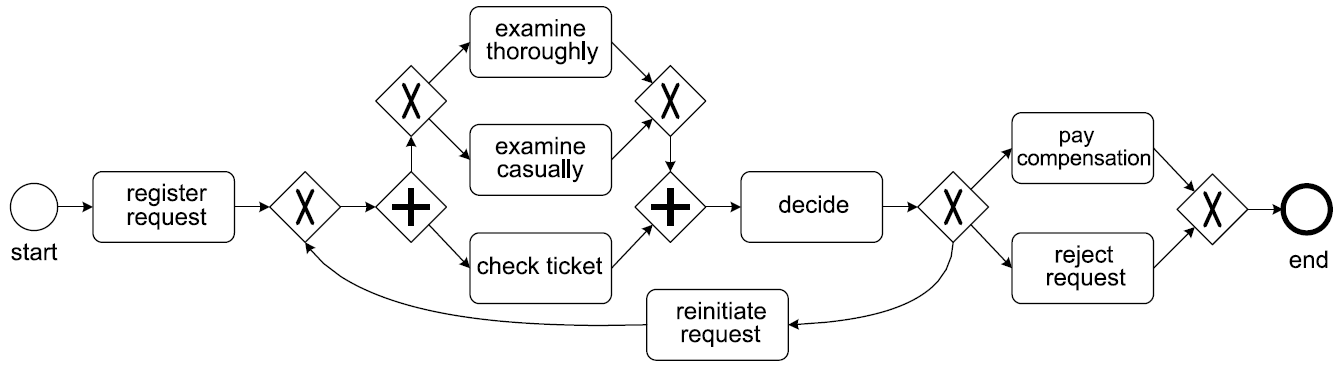

In [8]:
from IPython.display import Image, display
img=Image(url_github_repo+'jupyter/jupyterNotebooks/images/bpmn_running_example.png',width=600)
display(img)

We use a 'dummy' csv file and a dummy xes file containing only
- 6 cases
- 42 events
- 8 activities

### Loading a csv

In [9]:
import pandas as pd
event_log=pd.read_csv("simplifiedCustomerComplaintHandling.csv",sep=";")
event_log['timestamp']=pd.to_datetime(event_log['timestamp'])
event_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype                    
---  ------     --------------  -----                    
 0   case_id    42 non-null     int64                    
 1   activity   42 non-null     object                   
 2   timestamp  42 non-null     datetime64[ns, UTC+01:00]
 3   costs      42 non-null     int64                    
 4   resource   42 non-null     object                   
dtypes: datetime64[ns, UTC+01:00](1), int64(2), object(2)
memory usage: 1.8+ KB


In [10]:
event_log.head()

,case_id,activity,timestamp,costs,resource
0,3,register request,2010-12-30 14:32:00+01:00,50,Pete
1,3,examine casually,2010-12-30 15:06:00+01:00,400,Mike
2,3,check ticket,2010-12-30 16:34:00+01:00,100,Ellen
3,3,decide,2011-01-06 09:18:00+01:00,200,Sara
4,3,reinitiate request,2011-01-06 12:18:00+01:00,200,Sara


In [11]:
n_cases=len(event_log.case_id.unique())
n_events=len(event_log)
n_activities=len(event_log.activity.unique())
print('We have\n\t',n_cases,'cases (orders)\n\t', n_events,'events (rows in the csv), over\n\t',n_activities,'activities (the "things" that can happen in an event)')

We have
	 6 cases (orders)
	 42 events (rows in the csv), over
	 8 activities (the "things" that can happen in an event)


In [12]:
print('The events of case_id 2')
event_log[event_log.case_id==2]

The events of case_id 2


,case_id,activity,timestamp,costs,resource
9,2,register request,2010-12-30 11:32:00+01:00,50,Mike
10,2,check ticket,2010-12-30 12:12:00+01:00,100,Mike
11,2,examine casually,2010-12-30 14:16:00+01:00,400,Sean
12,2,decide,2011-01-05 11:22:00+01:00,200,Sara
13,2,pay compensation,2011-01-08 12:05:00+01:00,200,Ellen


Let's put some pm4py into the scene
- We format the dataframe to enable PM techniques
- We extract start and end activities

In [13]:
event_log = pm4py.format_dataframe(event_log, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
start_activities = pm4py.get_start_activities(event_log)
end_activities = pm4py.get_end_activities(event_log)
print("Start activities: {}\nEnd activities: {}\n".format(start_activities, end_activities))

print('The case_id 2 in the formatted dataframe')
event_log[event_log.case_id==2]

Start activities: {'register request': 6}
End activities: {'reject request': 3, 'pay compensation': 3}

The case_id 2 in the formatted dataframe


,case_id,activity,timestamp,costs,resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
5,2,register request,2010-12-30 10:32:00+00:00,50,Mike,2,register request,2010-12-30 10:32:00+00:00,5,1
6,2,check ticket,2010-12-30 11:12:00+00:00,100,Mike,2,check ticket,2010-12-30 11:12:00+00:00,6,1
7,2,examine casually,2010-12-30 13:16:00+00:00,400,Sean,2,examine casually,2010-12-30 13:16:00+00:00,7,1
8,2,decide,2011-01-05 10:22:00+00:00,200,Sara,2,decide,2011-01-05 10:22:00+00:00,8,1
9,2,pay compensation,2011-01-08 11:05:00+00:00,200,Ellen,2,pay compensation,2011-01-08 11:05:00+00:00,9,1


Format dataframe mainly helps
- for later exports in the standard format XES
- to better identify important information, like timestamps. The format of timestamps
  - is inferred
  - or can be specified, e.g., timestamp_format= "%Y-%m-%d %H:%M:%S%z". 
    - In order to avoid surprises, or buds, it is better to specify the timestamp format!

### Loading a XES file

In [14]:
event_log = pm4py.read_xes("simplifiedCustomerComplaintHandling.xes")
start_activities = pm4py.get_start_activities(event_log)
end_activities = pm4py.get_end_activities(event_log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))


c:\Users\Utente\OneDrive - Scuola Superiore Sant'Anna\Documenti\GitHub\ComputingDataAnalysisModeling20252026\BPM_PM\jupyter\jupyterNotebooks\.venv\Lib\site-packages\pm4py\utils.py:800: UserWarning: Install the optional requirement `rustxes` to import/export files faster.
  warnings.warn("Install the optional requirement `rustxes` to import/export files faster.")
c:\Users\Utente\OneDrive - Scuola Superiore Sant'Anna\Documenti\GitHub\ComputingDataAnalysisModeling20252026\BPM_PM\jupyter\jupyterNotebooks\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 2999.14it/s]

Start activities: {'register request': 6}
End activities: {'reject request': 3, 'pay compensation': 3}


In [15]:
#It is already formatted...
event_log

,concept:name,time:timestamp,cost:total,org:resource,@@index,case:concept:name
0,register request,2010-12-30 11:02:00+00:00,50,Pete,14,1
1,examine thoroughly,2010-12-31 10:06:00+00:00,400,Sue,15,1
2,check ticket,2011-01-05 15:12:00+00:00,100,Mike,16,1
3,decide,2011-01-06 11:18:00+00:00,200,Sara,17,1
4,reject request,2011-01-07 14:24:00+00:00,200,Pete,18,1
5,register request,2010-12-30 11:32:00+00:00,50,Mike,9,2
6,check ticket,2010-12-30 12:12:00+00:00,100,Mike,10,2
7,examine casually,2010-12-30 14:16:00+00:00,400,Sean,11,2
8,decide,2011-01-05 11:22:00+00:00,200,Sara,12,2
9,pay compensation,2011-01-08 12:05:00+00:00,200,Ellen,13,2


## Export the log 

In [16]:
event_log=pd.read_csv("simplifiedCustomerComplaintHandling.csv",sep=";")
event_log['timestamp']=pd.to_datetime(event_log['timestamp'])

event_log = pm4py.format_dataframe(event_log, case_id='case_id', activity_key='activity', timestamp_key='timestamp')



In [17]:
#First as a csv
event_log.to_csv("simplifiedCustomerComplaintHandling_exported.csv")

In [18]:
#Now as a xes
pm4py.write_xes(event_log,"simplifiedCustomerComplaintHandling_exported.xes")

exporting log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 638.76it/s]


## Simple log filters common in PM - can be done easily in Disco!

In [19]:
event_log = pm4py.read_xes("simplifiedCustomerComplaintHandling.xes")
start_activities = pm4py.get_start_activities(event_log)
end_activities = pm4py.get_end_activities(event_log)
print("Start activities: {}\nEnd activities: {}".format(start_activities, end_activities))

event_log.head()

parsing log, completed traces :: 100%|██████████| 6/6 [00:00<?, ?it/s]

Start activities: {'register request': 6}
End activities: {'reject request': 3, 'pay compensation': 3}


,concept:name,time:timestamp,cost:total,org:resource,@@index,case:concept:name
0,register request,2010-12-30 11:02:00+00:00,50,Pete,14,1
1,examine thoroughly,2010-12-31 10:06:00+00:00,400,Sue,15,1
2,check ticket,2011-01-05 15:12:00+00:00,100,Mike,16,1
3,decide,2011-01-06 11:18:00+00:00,200,Sara,17,1
4,reject request,2011-01-07 14:24:00+00:00,200,Pete,18,1


In [20]:
n_cases=len(event_log['case:concept:name'].unique())
n_events=len(event_log)
n_activities=len(event_log['concept:name'].unique())
print('We have\n\t',n_cases,'cases (orders)\n\t', n_events,'events (rows in the csv), over\n\t',n_activities,'activities (the "things" that can happen in an event)')

We have
	 6 cases (orders)
	 42 events (rows in the csv), over
	 8 activities (the "things" that can happen in an event)


### Give me all cases that start with...

In [21]:
#Give me all cases that start with...
filtered = pm4py.filter_start_activities(event_log, {'register request'})
print('We have',len(filtered),'events')

#Give me all cases that start with...
filtered = pm4py.filter_start_activities(event_log, {'fake activity'})
print('We have',len(filtered),'events')

#Give me all cases that start with...
filtered = pm4py.filter_start_activities(event_log, {'check ticket'})
print('We have',len(filtered),'events')

#Give me all cases that DO NOT start with...
filtered = pm4py.filter_start_activities(event_log, {'check ticket'},retain=False)
print('We have',len(filtered),'events')

We have 42 events
We have 0 events
We have 0 events
We have 42 events


### Give me all cases that end with...

In [22]:
#Give me all cases that end with...
filtered = pm4py.filter_end_activities(event_log, {'reject request'})
print('We have',len(filtered),'events')
print(filtered['case:concept:name'].unique())
print()

filtered = pm4py.filter_end_activities(event_log, {'pay compensation'})
print('We have',len(filtered),'events')
print(filtered['case:concept:name'].unique())
print()

filtered = pm4py.filter_end_activities(event_log, {'reject request','pay compensation'})
print('We have',len(filtered),'events')
print(filtered['case:concept:name'].unique())
print()


#Give me all cases that end with...
filtered = pm4py.filter_end_activities(event_log, {'fake activity'})
print('We have',len(filtered),'events')
print(filtered['case:concept:name'].unique())
print()


#Give me all cases that end with...
filtered = pm4py.filter_end_activities(event_log, {'check ticket'})
print('We have',len(filtered),'events')
print(filtered['case:concept:name'].unique())
print()


#Give me all cases that DO NOT end with...
filtered = pm4py.filter_end_activities(event_log, {'check ticket'},retain=False)
print('We have',len(filtered),'events')
print(filtered['case:concept:name'].unique())

We have 23 events
['1' '4' '5']

We have 19 events
['2' '3' '6']

We have 42 events
['1' '2' '3' '4' '5' '6']

We have 0 events
[]

We have 0 events
[]

We have 42 events
['1' '2' '3' '4' '5' '6']


### Give me all cases with at least 1 event such that...

In [23]:
event_log

,concept:name,time:timestamp,cost:total,org:resource,@@index,case:concept:name
0,register request,2010-12-30 11:02:00+00:00,50,Pete,14,1
1,examine thoroughly,2010-12-31 10:06:00+00:00,400,Sue,15,1
2,check ticket,2011-01-05 15:12:00+00:00,100,Mike,16,1
3,decide,2011-01-06 11:18:00+00:00,200,Sara,17,1
4,reject request,2011-01-07 14:24:00+00:00,200,Pete,18,1
5,register request,2010-12-30 11:32:00+00:00,50,Mike,9,2
6,check ticket,2010-12-30 12:12:00+00:00,100,Mike,10,2
7,examine casually,2010-12-30 14:16:00+00:00,400,Sean,11,2
8,decide,2011-01-05 11:22:00+00:00,200,Sara,12,2
9,pay compensation,2011-01-08 12:05:00+00:00,200,Ellen,13,2


In [24]:
print(event_log['cost:total'].unique())
print(event_log['case:concept:name'].unique())

[ 50 400 100 200]
['1' '2' '3' '4' '5' '6']


#### Contain events with a given cost

In [25]:
#Give me all cases that have 1 event with...
filtered = pm4py.filter_event_attribute_values(event_log, attribute_key='cost:total', level='case', values=[200],retain=True)
print(filtered['cost:total'].unique())
print(filtered['case:concept:name'].unique())
print()

filtered = pm4py.filter_event_attribute_values(event_log, attribute_key='cost:total', level='case', values=[201],retain=True)
print(filtered['cost:total'].unique())
print(filtered['case:concept:name'].unique())
print()


#Give me all cases that DO NOT have 1 event with...
filtered = pm4py.filter_event_attribute_values(event_log, attribute_key='cost:total', level='case', values=[200],retain=False)
print(filtered['cost:total'].unique())
print(filtered['case:concept:name'].unique())
print()

filtered = pm4py.filter_event_attribute_values(event_log, attribute_key='cost:total', level='case', values=[201],retain=False)
print(filtered['cost:total'].unique())
print(filtered['case:concept:name'].unique())
print()

[ 50 400 100 200]
['1' '2' '3' '4' '5' '6']

[]
[]

[]
[]

[ 50 400 100 200]
['1' '2' '3' '4' '5' '6']



#### Have been handled by Pete or Sue

In [26]:
print(event_log['org:resource'].unique())
print(event_log['case:concept:name'].unique())

['Pete' 'Sue' 'Mike' 'Sara' 'Sean' 'Ellen']
['1' '2' '3' '4' '5' '6']


In [27]:
#Give me all cases handled by Pete
filtered = pm4py.filter_event_attribute_values(event_log, attribute_key='org:resource', level='case', values=['Pete'],retain=True)
print(filtered['org:resource'].unique())
print(filtered['case:concept:name'].unique())
print()

#Drop all cases handled by Pete
filtered = pm4py.filter_event_attribute_values(event_log, attribute_key='org:resource', level='case', values=['Pete'],retain=False)
print(filtered['org:resource'].unique())
print(filtered['case:concept:name'].unique())
print()

['Pete' 'Sue' 'Mike' 'Sara' 'Ellen' 'Sean']
['1' '3' '4' '5']

['Mike' 'Sean' 'Sara' 'Ellen']
['2' '6']



### Filter variants - does not currently work!

### Directly/eventually follows relations

In [28]:
filtered = pm4py.filter_directly_follows_relation(event_log, [('check ticket', 'examine casually')])
filtered

,concept:name,time:timestamp,cost:total,org:resource,@@index,case:concept:name
5,register request,2010-12-30 11:32:00+00:00,50,Mike,9,2
6,check ticket,2010-12-30 12:12:00+00:00,100,Mike,10,2
7,examine casually,2010-12-30 14:16:00+00:00,400,Sean,11,2
8,decide,2011-01-05 11:22:00+00:00,200,Sara,12,2
9,pay compensation,2011-01-08 12:05:00+00:00,200,Ellen,13,2
24,register request,2011-01-06 09:02:00+00:00,50,Ellen,24,5
25,examine casually,2011-01-07 10:16:00+00:00,400,Mike,25,5
26,check ticket,2011-01-08 11:22:00+00:00,100,Pete,26,5
27,decide,2011-01-10 13:28:00+00:00,200,Sara,27,5
28,reinitiate request,2011-01-11 16:18:00+00:00,200,Sara,28,5


In [29]:
filtered = pm4py.filter_eventually_follows_relation(event_log, [('register request', 'reinitiate request')])
filtered

,concept:name,time:timestamp,cost:total,org:resource,@@index,case:concept:name
10,register request,2010-12-30 14:32:00+00:00,50,Pete,0,3
11,examine casually,2010-12-30 15:06:00+00:00,400,Mike,1,3
12,check ticket,2010-12-30 16:34:00+00:00,100,Ellen,2,3
13,decide,2011-01-06 09:18:00+00:00,200,Sara,3,3
14,reinitiate request,2011-01-06 12:18:00+00:00,200,Sara,4,3
15,examine thoroughly,2011-01-06 13:06:00+00:00,400,Sean,5,3
16,check ticket,2011-01-08 11:43:00+00:00,100,Pete,6,3
17,decide,2011-01-09 09:55:00+00:00,200,Sara,7,3
18,pay compensation,2011-01-15 10:45:00+00:00,200,Ellen,8,3
24,register request,2011-01-06 09:02:00+00:00,50,Ellen,24,5


### Filter based on time range

In [30]:
import datetime as dt

In [31]:
print(min(event_log['time:timestamp']))
print(max(event_log['time:timestamp']))

2010-12-30 11:02:00+00:00
2011-01-24 14:56:00+00:00


In [32]:
#Keep all events within the range
filtered = pm4py.filter_time_range(event_log, dt.datetime(2010, 12, 30), dt.datetime(2010, 12, 31), 
                                   mode='events')
filtered

,concept:name,time:timestamp,cost:total,org:resource,@@index,case:concept:name
0,register request,2010-12-30 11:02:00+00:00,50,Pete,14,1
5,register request,2010-12-30 11:32:00+00:00,50,Mike,9,2
6,check ticket,2010-12-30 12:12:00+00:00,100,Mike,10,2
7,examine casually,2010-12-30 14:16:00+00:00,400,Sean,11,2
10,register request,2010-12-30 14:32:00+00:00,50,Pete,0,3
11,examine casually,2010-12-30 15:06:00+00:00,400,Mike,1,3
12,check ticket,2010-12-30 16:34:00+00:00,100,Ellen,2,3


In [33]:
#Keep all cases within the range (start inside AND end inside)
filtered = pm4py.filter_time_range(event_log, dt.datetime(2010, 12, 30), dt.datetime(2010, 12, 31),
                                   mode='traces_contained')
filtered

,concept:name,time:timestamp,cost:total,org:resource,@@index,case:concept:name


In [34]:
#Keep all cases touching the range (start inside OR end inside)
filtered = pm4py.filter_time_range(event_log, dt.datetime(2010, 12, 30), dt.datetime(2010, 12, 31),
                                   mode='traces_intersecting')
filtered

,concept:name,time:timestamp,cost:total,org:resource,@@index,case:concept:name
0,register request,2010-12-30 11:02:00+00:00,50,Pete,14,1
1,examine thoroughly,2010-12-31 10:06:00+00:00,400,Sue,15,1
2,check ticket,2011-01-05 15:12:00+00:00,100,Mike,16,1
3,decide,2011-01-06 11:18:00+00:00,200,Sara,17,1
4,reject request,2011-01-07 14:24:00+00:00,200,Pete,18,1
5,register request,2010-12-30 11:32:00+00:00,50,Mike,9,2
6,check ticket,2010-12-30 12:12:00+00:00,100,Mike,10,2
7,examine casually,2010-12-30 14:16:00+00:00,400,Sean,11,2
8,decide,2011-01-05 11:22:00+00:00,200,Sara,12,2
9,pay compensation,2011-01-08 12:05:00+00:00,200,Ellen,13,2


## Mine your first model

### Mine a Petri net

We usee a specific process discovery algorithm know as
- Inductive miner ([slides](http://www.processmining.org/_media/presentations/2013/petri_nets.pptx), [paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.396.197&rep=rep1&type=pdf))

parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 2390.37it/s]


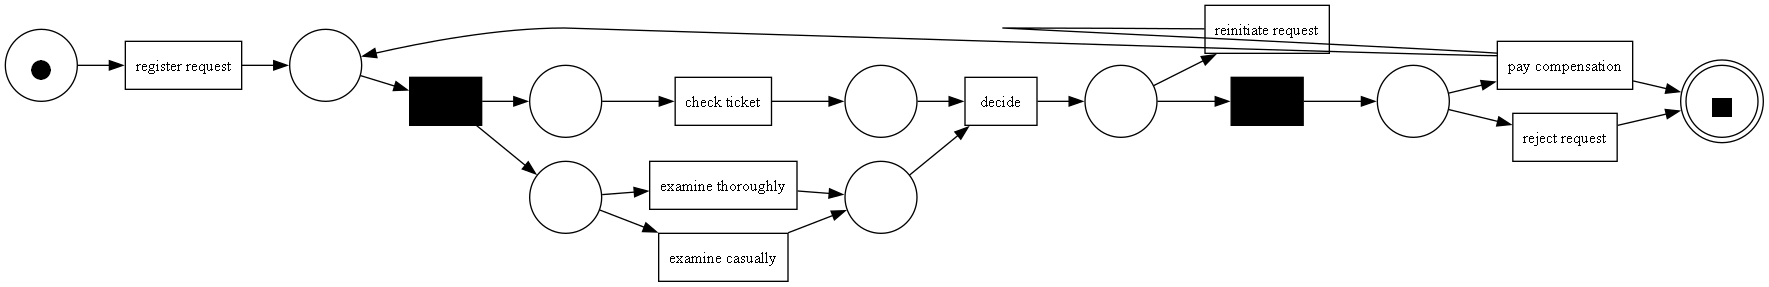

In [35]:
event_log = pm4py.read_xes("simplifiedCustomerComplaintHandling.xes")
pn, im, fm = pm4py.discover_petri_net_inductive(event_log)
places_list=list(pn.places)


pm4py.view_petri_net(pn, im, fm)

In [36]:
im

['source:1']

This is a Petri net model.

It contains:
- places (the circles)
- transitions (the activities)

The place with the small black cicrle is the initial one (it is in `im`)
- It has a _token_, the small black circle

The right-most place is the final one (it is in `fm`)
- It is denoted by the double circle


We can see that:
- Every request begins with `register request` (initial state in `im`, denoted by a black circle inside)
- Every request end with either `reject request` or `pay compensation` (final state in `fm`, denoted by a double circle)



The model can be 'executed'
  - We execute activities by moving tokens across them
  - An activity can be executed only when all its input places contain tokens (e.g. `decide` needs two)
  - When executing an activity, a token is added in the output place of that transition (to each out place)
    - upon executing `register request` the token on its left will move in the place on its right
  - Black transitions are _silent_. They do not produce any activity. 
  - By executing a Petri net, we can generate logs
  


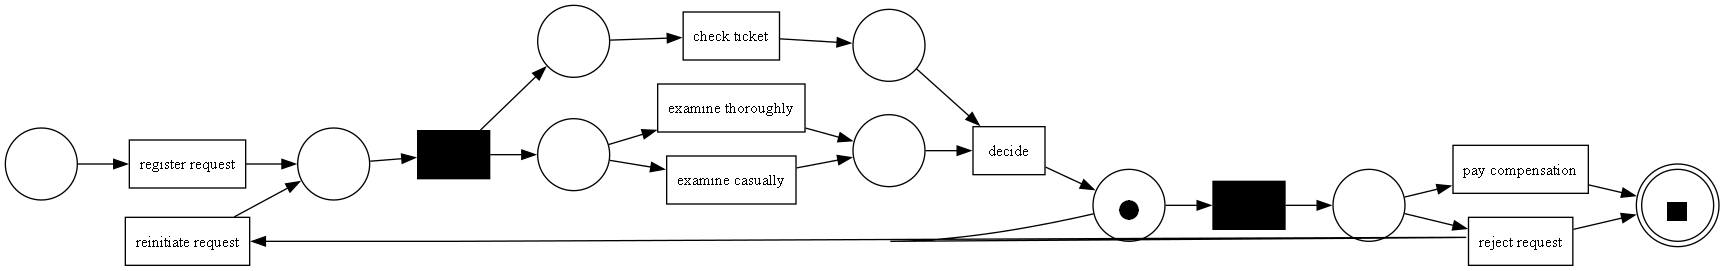

In [37]:
#We perform register request, and move the token on its right
m=pm4py.Marking()
m[places_list[5]]=1
pm4py.view_petri_net(pn, m, fm)

#### Token-based replay of the Petri net

If we execute the model:
- We perform `register request`, and move the token on its right
- Then we execute the silent transition. This will create 2 tokens in its two outgoing places
  - Both `examine thoroughly` and `examine casually` are enabled. Only one will be chosen. 
    - This models a __choice__: the process can execute any of the two, but only one
  - At the same time, `check ticket` is enabled as well. It can be executed before or after the `examine` ones. 
    - This models __parallel__: the process must execute both, but the order does not matter
- The action `decide` needs the parallel to conclude to get its token that enables it. 
- After executing `decide`, we either loop back with `reinitiate request`, or move forward executing a silent transition. 
  - In the latter case, we pick either `reject request` or `pay compensation`, and then terminate
  - We __terminate correctly__ because we end up in a final state (in `fm`), denoted by a double circle

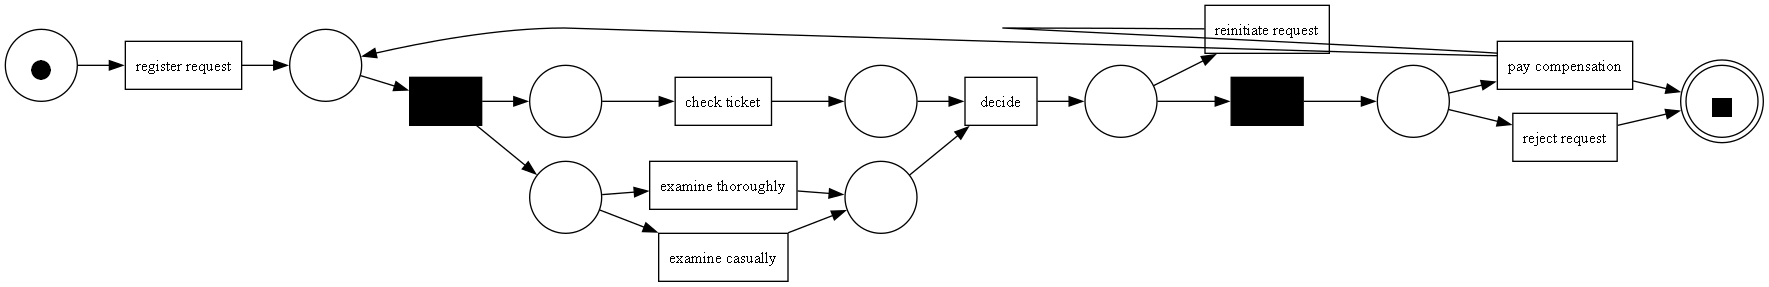

In [38]:
pm4py.view_petri_net(pn, im, fm)

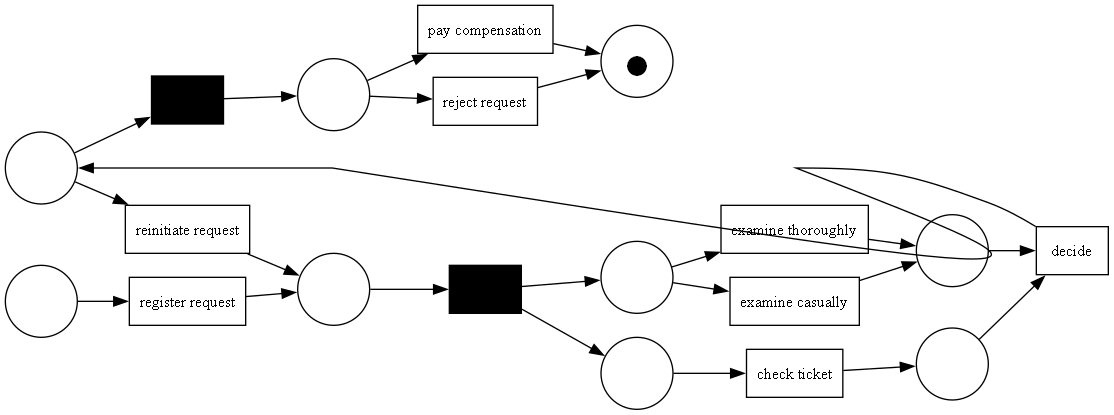

In [39]:
#We perform register request
m=pm4py.Marking()
m[places_list[3]]=1
#m[places_list[7]]=1
pm4py.view_petri_net(pn, m, fm)

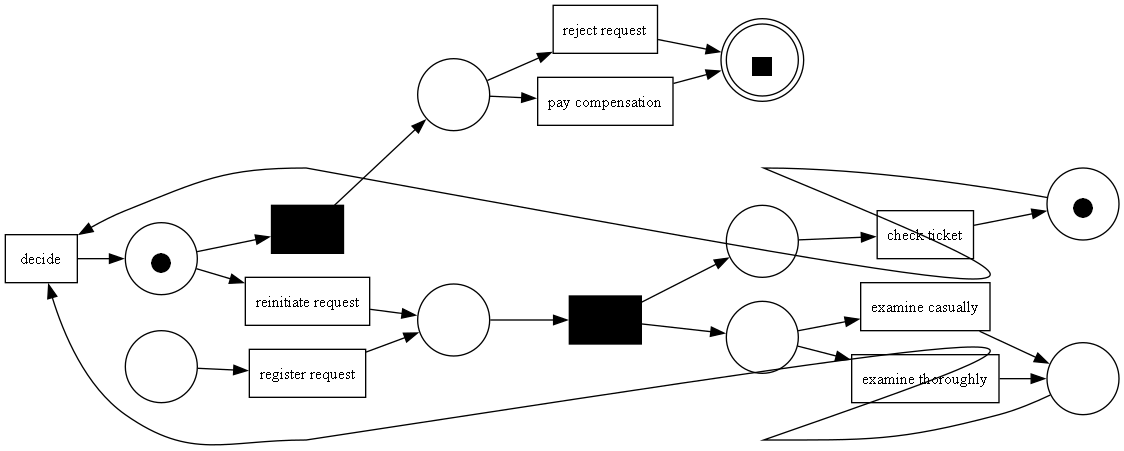

In [40]:
#We perform the silent action, and create two tokens its right
m=pm4py.Marking()
m[places_list[5]]=1
m[places_list[7]]=1
pm4py.view_petri_net(pn, m, fm)

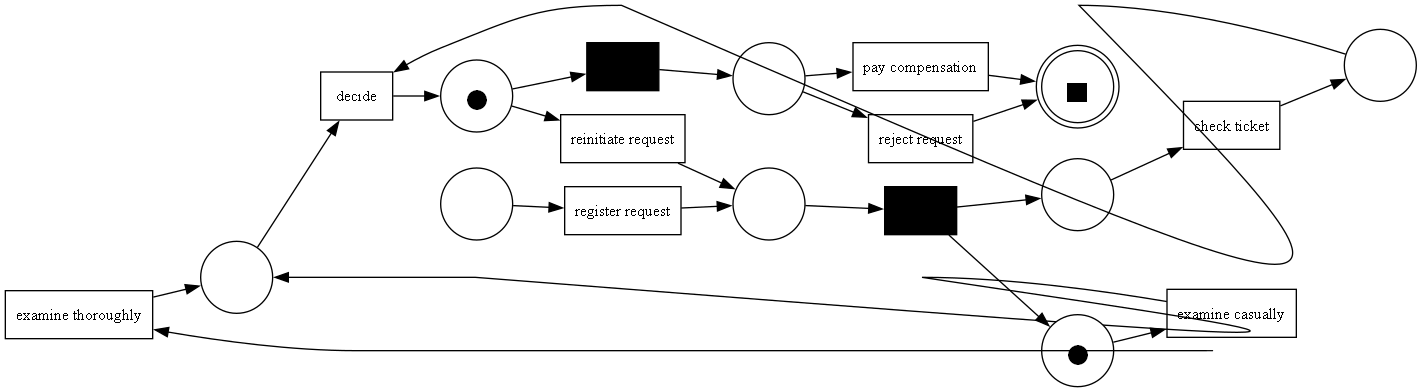

In [41]:
#We execute examine thoroughly (we skip examine casually), and create a token after it.
#Decide is not enabled yet
m=pm4py.Marking()
m[places_list[5]]=1
m[places_list[8]]=1
pm4py.view_petri_net(pn, m, fm)

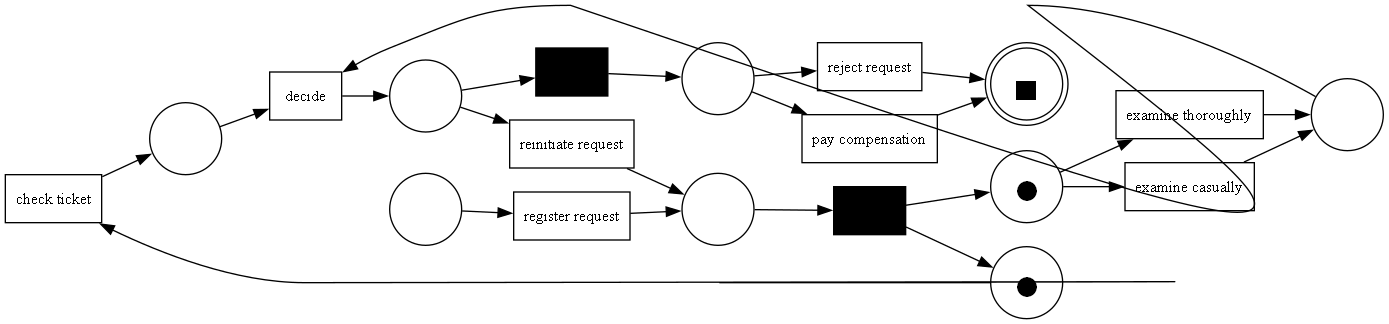

In [42]:
#We now also execute check ticket. 
#Now decide is enable
m=pm4py.Marking()
m[places_list[6]]=1
m[places_list[8]]=1
pm4py.view_petri_net(pn, m, fm)

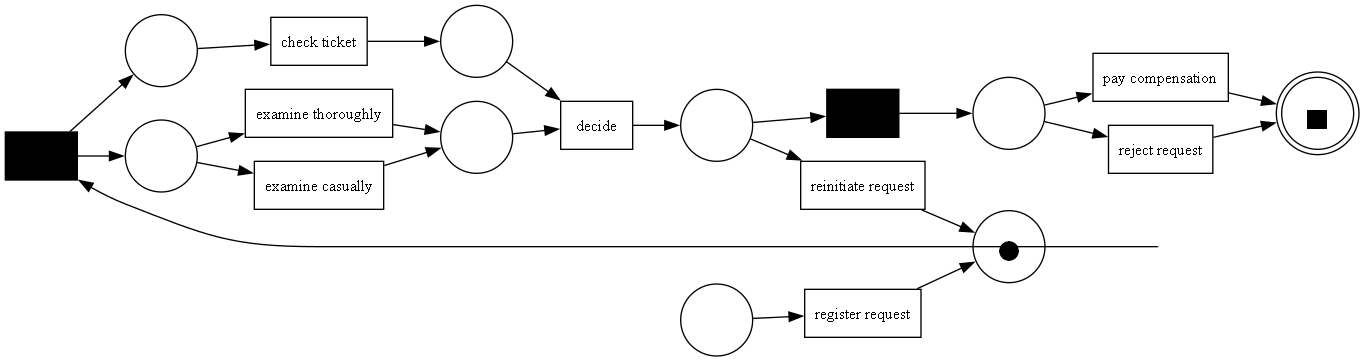

In [43]:
#We perform decide.
# We can now perform either the loop back, or the silent transition
m=pm4py.Marking()
m[places_list[4]]=1
pm4py.view_petri_net(pn, m, fm)

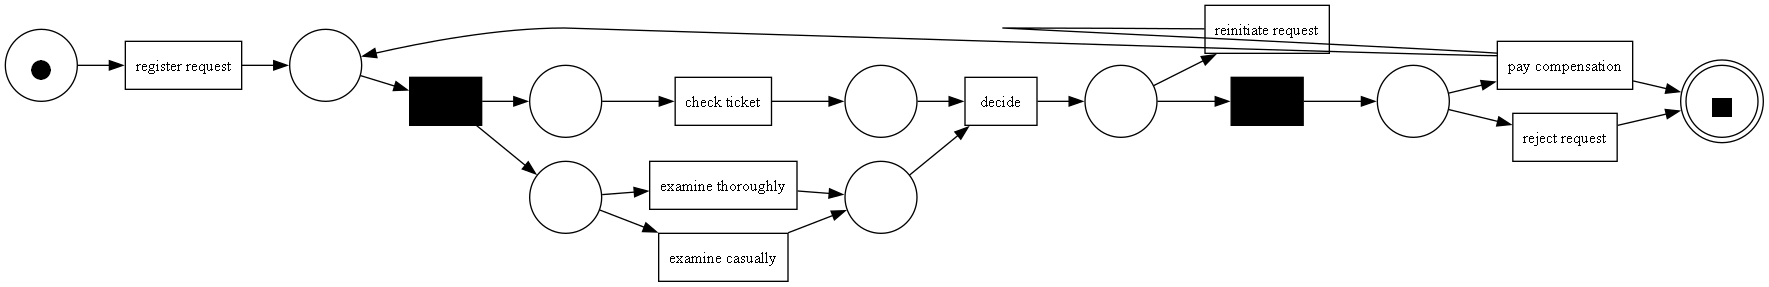

In [44]:
#We the silent transition
m=pm4py.Marking()
m[places_list[1]]=1
pm4py.view_petri_net(pn, m, fm)

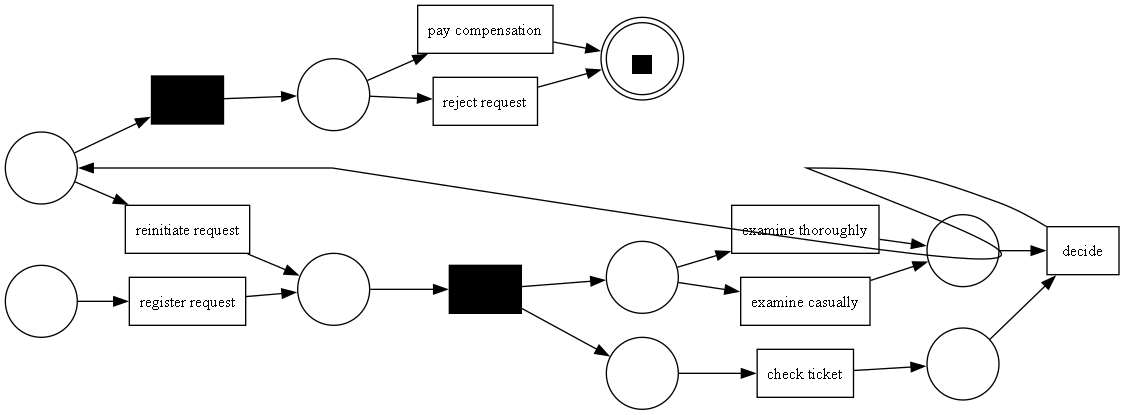

In [45]:
#We perform reject request, and the computation is over
m=pm4py.Marking()
#m[places_list[6]]=1
pm4py.view_petri_net(pn, m, fm)

Overall, we have generated this trace:
- register request
- examine thoroughly
- check ticket
- decide 
- reject request

### Mine a BPMN (a richer Petri net)

We usee a specific process discovery algorithm know as
- Inductive miner ([slides](http://www.processmining.org/_media/presentations/2013/petri_nets.pptx), [paper](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.396.197&rep=rep1&type=pdf))

parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 2665.87it/s]


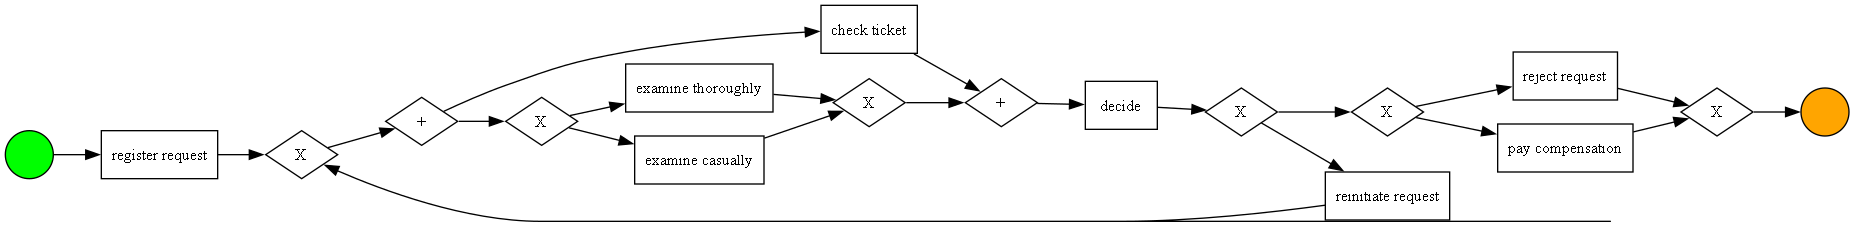

In [46]:
event_log = pm4py.read_xes("simplifiedCustomerComplaintHandling.xes")

process_tree = pm4py.discover_process_tree_inductive(event_log)
bpmn_model = pm4py.convert_to_bpmn(process_tree)
pm4py.view_bpmn(bpmn_model)

This is a BPMN model
- It is executed by 
  - adding a _token_ in the initial node, the green circle
  - moving the token across the activities (rectangles)
  - `X` means _choice_, i.e., the token can decide to take any outgoing path 
     - Any of the outgoing paths can be taken. This models optional activities or alternatives
     - Either `examine thoroughly` or `examine casually` are executed.        
     - > What about `reject request` and `pay compensation`?
  - `+` means _parallel_, i.e., the token multiplies placing on token in each outgoing edge
     - All outgoing paths will be taken, advancing one token at a time. But the order does not matter
     - This models parallelism, that is: certain actions must happen, but the order among them does not matter
     - By combining the `+` and `X` we have that the following are admitted
       - `check ticket`, `examine casually` 
       - `check ticket`, `examine thoroughly`
       - `examine casually`, `check ticket`
       - `examine thoroughly`, `check ticket`     
  - Both `X` and `+` nodes must be closed later with further `X` and `+` nodes.

We can see that:
- Every request begins with `register request`
- Every request end with either `reject request` or `pay compensation`

We can execute the model:
- We perform `register request`
- Then we enter the '+' and do in parallel
  - `check ticket`
  - either `examine thoroughly` or `examine casually`. Then the `X` closes
- Then the `+` closes when the two actions are executed
- Then we do decide
  - to `reinitiate request` ...
  - to either `reject request` or `pay compensation`

  


You may have noticed that we create an intermediate, simpler, model: a _process tree_
- It contains part of the information in the BPMN model. 
- Actually, we mine the BPMN using this information

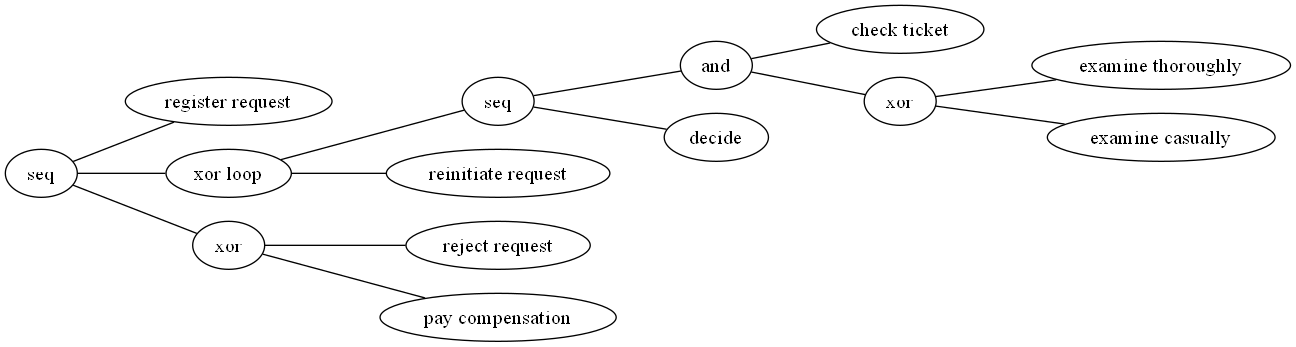

In [47]:
pm4py.view_process_tree(process_tree)

### Mine a Disco's dependency graph (aka process map)

#### Simple counting algorithm

- First we use a _simple_ algorithm to discover dependency graphs
- It just count and reports occurrences
  - Just collects information about pairs of activities that _directly follow_ (they appear one after another), and count such occurrences
- It is just a graphical representation of the data

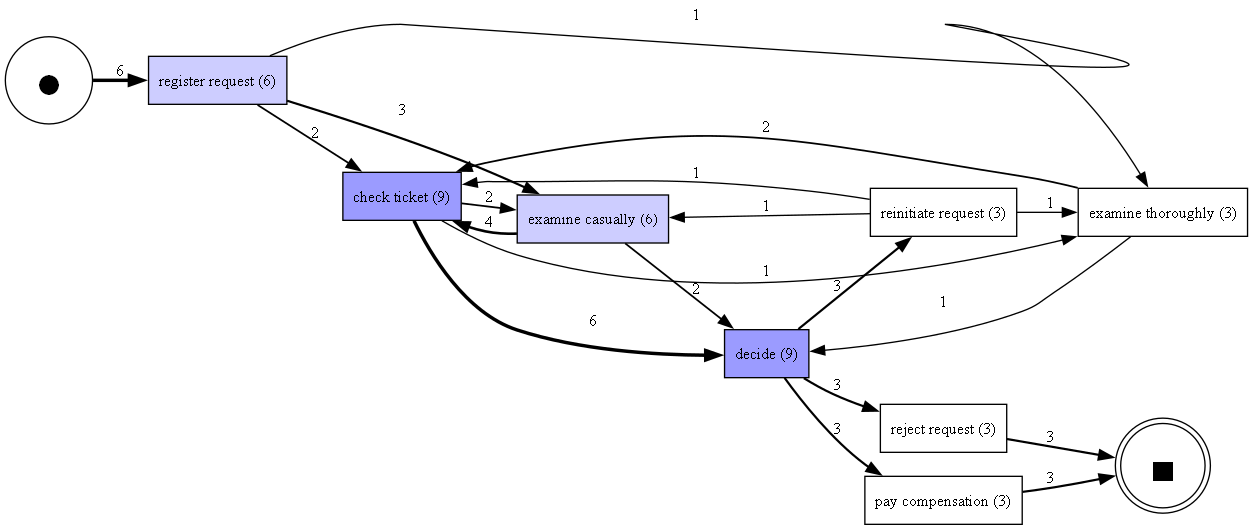

In [48]:
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

> _It is difficult to infer the actual execution of the process based on the process map. Hence, when using process maps, one should be very careful when trying to comprehend the actual process._

#### Heuristic miner

The library pm4py also implements a more advanced algorithm to discover process maps: 
- Heuristic miner.
- We will discuss it in later classes
- Rather than just counting, it performs (simple) causality analyses...
  - It finds and omits spurious directly follow pairs checking how often
    - the two activities happen together, and in which order
    - each single activity happens without the other
  - It is __NOT__ just a graphical representation of the data. It aims at discovering _concurrency_
    - It discovers that the `check ticket` and `examine thoroughly` are __concurrent__ (similar to the `+` above).
      - Therefore, they are not connected in the map, even though they directly follow each other
      - An HM_map is typically simpler and more informative than a DFG-based one
- More details on this [paper](https://ieeexplore.ieee.org/iel5/5937059/5949295/05949453.pdf)

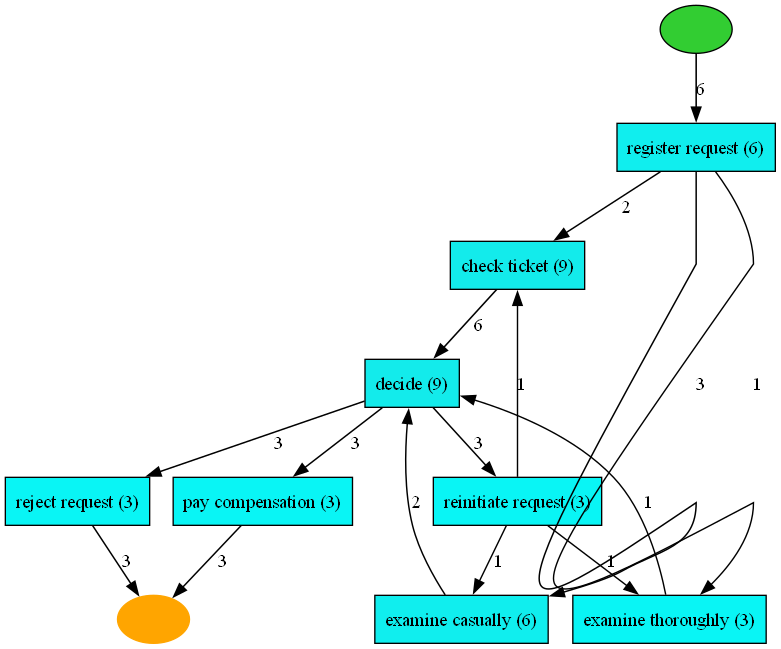

In [49]:
map = pm4py.discover_heuristics_net(event_log)
pm4py.view_heuristics_net(map)

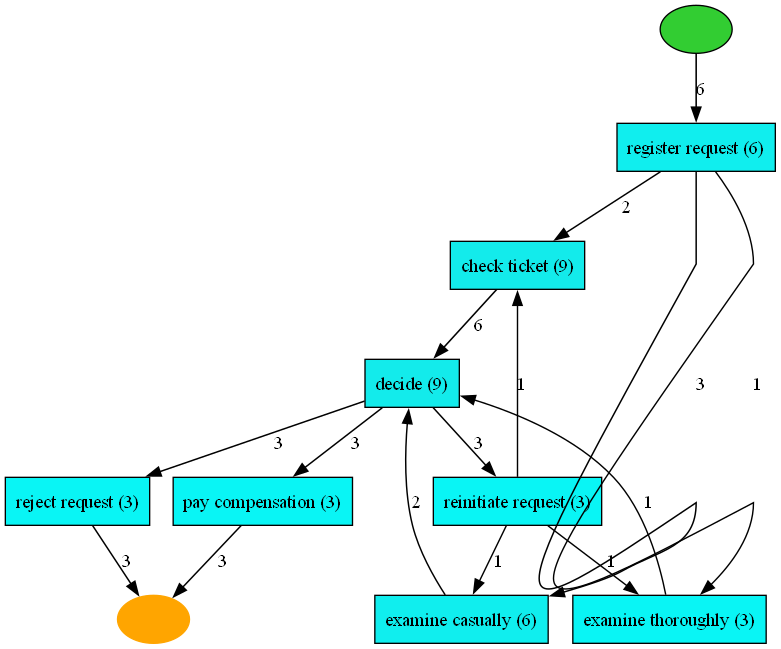

In [50]:
map = pm4py.discover_heuristics_net(event_log,dependency_threshold = 0.5)
pm4py.view_heuristics_net(map)

## Conformance checking

So far we discussed _process discovery_. 
- This is just one of the goals of PM

Another important goal is _conformance checking_
- How good is my model? 
  - Does it reflect all the reality? 
  - Does it miss parts of it? 
  - Does it include spurious behavior?
- How good is the actual process? 
  - Does it conform to what prescribed in a reference model?
  
These questions can be answered using conformance checking techniques
- We are going to have one specific class on this
- Here, we briefly review pm4py capabilities for this task, remaining at intuitive level

We are going to use two approaches to this:
- token-based: 
  - It tells you if a trace fits the model, and if not _how far is it_. 
  - It does not give you diagnostics: does not tell you how to fix the log (or the model
- alignment-based
  - It gives you diagnostics: it tells you how to _align_ the model with the log

Today we will remain on a high-level, only focusing on pm4py features
- we are going to cover in detail this topic in a later class

### Let's reload and re-discover the model

parsing log, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 4629.47it/s]


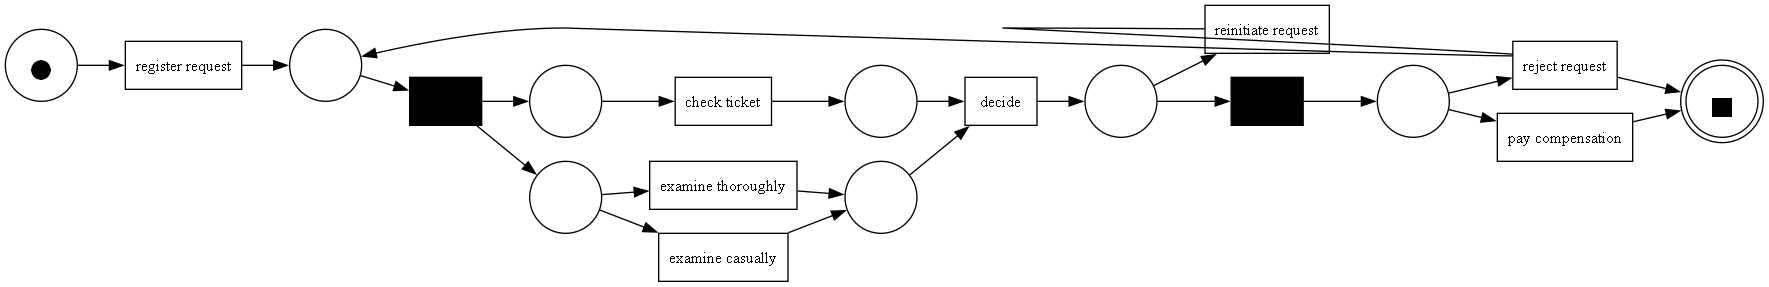

In [51]:
#Let's create once more a model: a Petri net
event_log = pm4py.read_xes("simplifiedCustomerComplaintHandling.xes")
pn, im, fm = pm4py.discover_petri_net_inductive(event_log)
places_list=list(pn.places)


pm4py.view_petri_net(pn, im, fm)

### We consider two modified csv files
- simplifiedCustomerComplaintHandling-removed_reinit.csv: we remove the reinitiate event from case 3
- simplifiedCustomerComplaintHandling-doubled_reinit.csv: we double the reinitiate event from case 3

In [52]:
#We now load a CSV file where we removed the rinitiate request from case id 3.
# This log does not comply with the model
event_log_removed_reinit=pd.read_csv("simplifiedCustomerComplaintHandling-removed_reinit.csv",sep=";")
event_log_removed_reinit['timestamp']=pd.to_datetime(event_log_removed_reinit['timestamp'])
event_log_removed_reinit = pm4py.format_dataframe(event_log_removed_reinit, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
print("Original:",len(event_log),"Modified:",len(event_log_removed_reinit))

event_log_removed_reinit[event_log_removed_reinit['case:concept:name']=='3']

Original: 42 Modified: 41


,case_id,activity,timestamp,costs,resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
10,3,register request,2010-12-30 13:32:00+00:00,50,Pete,3,register request,2010-12-30 13:32:00+00:00,10,2
11,3,examine casually,2010-12-30 14:06:00+00:00,400,Mike,3,examine casually,2010-12-30 14:06:00+00:00,11,2
12,3,check ticket,2010-12-30 15:34:00+00:00,100,Ellen,3,check ticket,2010-12-30 15:34:00+00:00,12,2
13,3,decide,2011-01-06 08:18:00+00:00,200,Sara,3,decide,2011-01-06 08:18:00+00:00,13,2
14,3,examine thoroughly,2011-01-06 12:06:00+00:00,400,Sean,3,examine thoroughly,2011-01-06 12:06:00+00:00,14,2
15,3,check ticket,2011-01-08 10:43:00+00:00,100,Pete,3,check ticket,2011-01-08 10:43:00+00:00,15,2
16,3,decide,2011-01-09 08:55:00+00:00,200,Sara,3,decide,2011-01-09 08:55:00+00:00,16,2
17,3,pay compensation,2011-01-15 09:45:00+00:00,200,Ellen,3,pay compensation,2011-01-15 09:45:00+00:00,17,2


In [53]:
#We now load a CSV file where we removed the rinitiate request from case id 3.
# This log does not comply with the model
event_log_doubled_reinit=pd.read_csv("simplifiedCustomerComplaintHandling-doubled_reinit.csv",sep=";")
event_log_doubled_reinit['timestamp']=pd.to_datetime(event_log_doubled_reinit['timestamp'])
event_log_doubled_reinit = pm4py.format_dataframe(event_log_doubled_reinit, case_id='case_id', activity_key='activity', timestamp_key='timestamp')
print("Original:",len(event_log),"Modified:",len(event_log_doubled_reinit))

event_log_doubled_reinit[event_log_doubled_reinit['case:concept:name']=='3']

Original: 42 Modified: 43


,case_id,activity,timestamp,costs,resource,case:concept:name,concept:name,time:timestamp,@@index,@@case_index
10,3,register request,2010-12-30 13:32:00+00:00,50,Pete,3,register request,2010-12-30 13:32:00+00:00,10,2
11,3,examine casually,2010-12-30 14:06:00+00:00,400,Mike,3,examine casually,2010-12-30 14:06:00+00:00,11,2
12,3,check ticket,2010-12-30 15:34:00+00:00,100,Ellen,3,check ticket,2010-12-30 15:34:00+00:00,12,2
13,3,decide,2011-01-06 08:18:00+00:00,200,Sara,3,decide,2011-01-06 08:18:00+00:00,13,2
14,3,reinitiate request,2011-01-06 11:18:00+00:00,200,Sara,3,reinitiate request,2011-01-06 11:18:00+00:00,14,2
15,3,reinitiate request,2011-01-06 11:28:00+00:00,200,Sara,3,reinitiate request,2011-01-06 11:28:00+00:00,15,2
16,3,examine thoroughly,2011-01-06 12:06:00+00:00,400,Sean,3,examine thoroughly,2011-01-06 12:06:00+00:00,16,2
17,3,check ticket,2011-01-08 10:43:00+00:00,100,Pete,3,check ticket,2011-01-08 10:43:00+00:00,17,2
18,3,decide,2011-01-09 08:55:00+00:00,200,Sara,3,decide,2011-01-09 08:55:00+00:00,18,2
19,3,pay compensation,2011-01-15 09:45:00+00:00,200,Ellen,3,pay compensation,2011-01-15 09:45:00+00:00,19,2


### Token-based conformance checking

As we have seen, this model can be executed creating logs. <br/>
Token-based conformance checking tries to replay each trace of a log on a model to answer, roughly, to these questions
- Given a trace in the log, can we _replay_ it in the model? That is, can we make an execution that produces the same events?
- How far is the log from the model?

By repeating this check on all the traces in the log, we can study several measures of quality. One of these is
- __fitness__: 
  - how well the log fits the model? 
  - how well the log can be replayed by the model?

We will see in details token-based conformance checking in later classes
- intuitively: if there are problems in replaying a trace on a model, 
  - we add tokens trying to 'fill' missing activities (and count how many tokens we added)
  - we count remaining tokens after having reached the final state
  - If both counters are zero, then the logs perfectly match the model
    - they can be replayed
  - Otherwise, there are problems, and the counters give us some info on the number  of problems.
    - Based on this, each trace gets a __fitness__ measure
      - 1: the trace can be replayed 
      - \[0,1): the trace cannot be replayed exactly. The lower the value, the more problematic is the trace (the higher will be the counters)
    - Based on fitness of single traces, we can compute the fitness of a log

A description of the pm4py function is available here
- https://processintelligence.solutions/static/api/2.7.11/generated/pm4py.conformance.fitness_token_based_replay.html
- Root page of API

In [54]:
pm4py.fitness_token_based_replay(event_log,pn,im,fm)

replaying log with TBR, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1999.03it/s]


{'perc_fit_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 1.0,
 'percentage_of_fitting_traces': 100.0}

We can see that:
 - `'perc_fit_traces': and 100.0` : all traces perfectly match
 -  `'average_trace_fitness': 1.0` : the average of the fitness of each trace is 1
 - `'log_fitness': 1.0` : not important for now. Think of it as '
 - `'percentage_of_fitting_traces'`: 100.0 : same as `'perc_fit_traces'`

In [55]:
pm4py.fitness_token_based_replay(event_log_removed_reinit,pn,im,fm)

replaying log with TBR, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1226.05it/s]


{'perc_fit_traces': 83.33333333333333,
 'average_trace_fitness': 0.9802350427350427,
 'log_fitness': 0.9784679089026915,
 'percentage_of_fitting_traces': 83.33333333333333}

In [56]:
pm4py.fitness_token_based_replay(event_log_doubled_reinit,pn,im,fm)

replaying log with TBR, completed traces :: 100%|██████████| 6/6 [00:00<00:00, 1458.89it/s]


{'perc_fit_traces': 83.33333333333333,
 'average_trace_fitness': 0.9895833333333334,
 'log_fitness': 0.9863013698630136,
 'percentage_of_fitting_traces': 83.33333333333333}

### Alignment-based

Alignment-based conformance checking takes a different perspective on the problem
- Given two traces, what are the changes to apply to make them equal? A sort of _edit distance_
- Given a model and a trace
  - We compute the trace that can be generated by the model which is the _closest_ to the trace
  - The number of _changes necessary_ give you the fitness

Alignment-based conformance checking gives more information:
- it suggests you how to fix the log or the model!
- it suggests you how to align the log and the model




Given a model and a trace
- we get suggestions on how to change the trace to align it with the model
- one can specify _costs of changes_, to favour certain alignments with respect to others

Of course, we can first get fitness

In [57]:
pm4py.fitness_alignments(event_log,pn,im,fm)

aligning log, completed variants :: 100%|██████████| 6/6 [00:00<00:00, 398.64it/s]


{'percFitTraces': 100.0,
 'averageFitness': 1.0,
 'percentage_of_fitting_traces': 100.0,
 'average_trace_fitness': 1.0,
 'log_fitness': 0.9999791670138831}

In [58]:
pm4py.fitness_alignments(event_log_removed_reinit,pn,im,fm)

aligning log, completed variants :: 100%|██████████| 6/6 [00:00<00:00, 393.01it/s]


{'percFitTraces': 83.33333333333333,
 'averageFitness': 0.9871794871794872,
 'percentage_of_fitting_traces': 83.33333333333333,
 'average_trace_fitness': 0.9871794871794872,
 'log_fitness': 0.9858946045982322}

Now we can get diagnostics.

Diagnostics are given in terms of __moves__:
- `(activity_1,activity_1)` means _log and model move_, or _synchronous move_: I have an activity that can be performed by both the log and the model. It is __OK__
- `(activity_1,>>)` means: _log move_: an activity that the model cannot replicate
- `(>>,activity_1)` means: _model move_: an activity that the log cannot replicate

Imagine we have this trace:
- `<register request, register request, examine casually, check ticket, reject request>`

An alignment is:
  - `(register request, register request)`
  - `(register request, >>)`   &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    HERE WE NEED TO ALIGN!
  - `(examine casually, examine casually)`
  - `(check ticket, check ticket)`
  - `(>>, decide)`  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    HERE WE NEED TO ALIGN!
  - `(reject request,reject request)`
  
  
<br/><br/>
Please note: `(>>, None)` is OK
- None represents a silent transition. It is _implictly matched_ by `>>`.

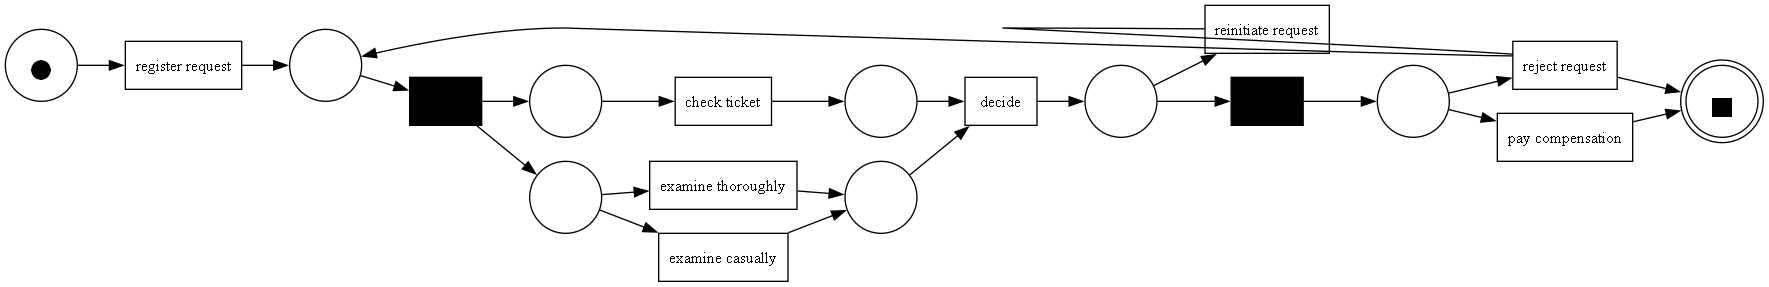

In [59]:
pm4py.view_petri_net(pn, im, fm)

If you read the 'right' column in the alignment above, ignore `>>`, 
- You get the model behavior that fits best the trace!
- The notion of _best_ can be tuned by providing specific cost functions

In [60]:
#event_log_removed_reinit
diagnostics= pm4py.conformance_diagnostics_alignments(event_log_removed_reinit,pn,im,fm)
diagnostics

aligning log, completed variants :: 100%|██████████| 6/6 [00:00<00:00, 425.03it/s]


[{'alignment': [('register request', 'register request'),
   ('>>', None),
   ('examine thoroughly', 'examine thoroughly'),
   ('check ticket', 'check ticket'),
   ('decide', 'decide'),
   ('>>', None),
   ('reject request', 'reject request')],
  'cost': 2,
  'visited_states': 7,
  'queued_states': 23,
  'traversed_arcs': 23,
  'lp_solved': 1,
  'fitness': 1.0,
  'bwc': 100002},
 {'alignment': [('register request', 'register request'),
   ('>>', None),
   ('check ticket', 'check ticket'),
   ('examine casually', 'examine casually'),
   ('decide', 'decide'),
   ('>>', None),
   ('pay compensation', 'pay compensation')],
  'cost': 2,
  'visited_states': 7,
  'queued_states': 24,
  'traversed_arcs': 24,
  'lp_solved': 1,
  'fitness': 1.0,
  'bwc': 100002},
 {'alignment': [('register request', 'register request'),
   ('>>', None),
   ('examine casually', 'examine casually'),
   ('check ticket', 'check ticket'),
   ('decide', 'decide'),
   ('>>', 'reinitiate request'),
   ('>>', None),
   (

In [61]:
print('No problem in the first trace')
diagnostics[0]['alignment']

No problem in the first trace


[('register request', 'register request'),
 ('>>', None),
 ('examine thoroughly', 'examine thoroughly'),
 ('check ticket', 'check ticket'),
 ('decide', 'decide'),
 ('>>', None),
 ('reject request', 'reject request')]

In [62]:
print('No problem in the second trace')
diagnostics[1]['alignment']

No problem in the second trace


[('register request', 'register request'),
 ('>>', None),
 ('check ticket', 'check ticket'),
 ('examine casually', 'examine casually'),
 ('decide', 'decide'),
 ('>>', None),
 ('pay compensation', 'pay compensation')]

In [63]:
diagnostics[1]

{'alignment': [('register request', 'register request'),
  ('>>', None),
  ('check ticket', 'check ticket'),
  ('examine casually', 'examine casually'),
  ('decide', 'decide'),
  ('>>', None),
  ('pay compensation', 'pay compensation')],
 'cost': 2,
 'visited_states': 7,
 'queued_states': 24,
 'traversed_arcs': 24,
 'lp_solved': 1,
 'fitness': 1.0,
 'bwc': 100002}

In [64]:
print('PROBLEM in the third trace!')
diagnostics[2]['alignment']

PROBLEM in the third trace!


[('register request', 'register request'),
 ('>>', None),
 ('examine casually', 'examine casually'),
 ('check ticket', 'check ticket'),
 ('decide', 'decide'),
 ('>>', 'reinitiate request'),
 ('>>', None),
 ('examine thoroughly', 'examine thoroughly'),
 ('check ticket', 'check ticket'),
 ('decide', 'decide'),
 ('>>', None),
 ('pay compensation', 'pay compensation')]

In [65]:
diagnostics[2]

{'alignment': [('register request', 'register request'),
  ('>>', None),
  ('examine casually', 'examine casually'),
  ('check ticket', 'check ticket'),
  ('decide', 'decide'),
  ('>>', 'reinitiate request'),
  ('>>', None),
  ('examine thoroughly', 'examine thoroughly'),
  ('check ticket', 'check ticket'),
  ('decide', 'decide'),
  ('>>', None),
  ('pay compensation', 'pay compensation')],
 'cost': 10003,
 'visited_states': 12,
 'queued_states': 39,
 'traversed_arcs': 39,
 'lp_solved': 1,
 'fitness': 0.9230769230769231,
 'bwc': 130002}

# Further resources on PM

Do not forget to look at our 
- amazing notebook on PM & Data: case studies, benchmarks, event data vs non event data

Further material
- https://github.com/TheWoops/awesome-processmining
- https://github.com/process-intelligence-solutions/pm4py/blob/release/notebooks/5_advanced_examples.ipynb